In [31]:
%matplotlib inline
import my_functions as mf
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import h5py
speed_of_light = 299792.458
path = '../Data/011/Lev5/' #path for the simulation
extrapolation_order = 2

alm = []
H2 = []

input_file1 = h5py.File(path+'rhOverM_Asymptotic_GeometricUnits.h5','r')
SXS = input_file1['Extrapolated_N%i.dir'%(extrapolation_order)]['Y_l%i_m%i.dat'%(2,-1)]
t = SXS[:,0]
dt = np.diff(t)

def ALM(l,m):
    #print("lol",l,m)
    if m>l or m<-l or l<2 or l>8:
        return 0
    return alm[l-2][m+l]
def Hcomp(l,m):
    if m>l or m<-l or l<2 or l>8:
        return 0
    return H2[l-2][m+l]
def norm(vector):
    return np.sqrt(vector[0]*vector[0]+vector[1]*vector[1]+vector[2]*vector[2])

meta = open(path+'metadata.txt','r')
for line in meta:
    line = line.translate(None,",")
    line = line.split()
    if(len(line)<2):
        continue;
    var = line[0].translate(None," ")
    if var == 'initial-ADM-energy':
        initial_mass = float(line[2])
    if var == 'initial-ADM-linear-momentum':
        initial_p = np.array([float(line[2]),float(line[3]),float(line[4])])
    if var == 'initial-ADM-angular-momentum':
        initial_j = np.array([float(line[2]),float(line[3]),float(line[4])])
    if var == 'remnant-mass':
        remnant_mass = float(line[2])
    if var == 'remnant-spin':
        remnant_spin = np.array([float(line[2]),float(line[3]),float(line[4])])
    if var == 'initial-mass1':
        initial_mass1 = float(line[2])
    if var == 'initial-mass2':
        initial_mass2 = float(line[2])
    if var == 'initial-spin1':
        initial_spin1 = np.array([float(line[2]),float(line[3]),float(line[4])])
    if var == 'initial-spin2':
        initial_spin2 = np.array([float(line[2]),float(line[3]),float(line[4])])
    
        
#The following are coefficients used in calculations of radiated angular and linear momentum       
def f(l,m):
    return np.sqrt((l-m)*(l+m+1))
def a(l,m):
    return np.sqrt((1.0+0j)*(l-m)*(l+m+1.0))/(l*(l+1.0))
def b(l,m):
    return (np.sqrt((1+0j)*(l-2.0)*(l+2.0)*(l+m)*(l+m-1.0)/(2.0*l-1.0)/(2.0*l+1.0)))/(2.0*l)
def c(l,m):
    return 2.0*m/(l*(l+1.0))
def d(l,m):
    return (np.sqrt((1.0+0j)*(l-2.0)*(l+2.0)*(l-m)*(l+m)/(2.0*l-1.0)/(2.0*l+1)))/l


#Calculates the H and Hdots to be used for further analysis.
for l in range(2,9):
    alm.append([])
    H2.append([])
    for m in range(-l,l+1):
        SXS = input_file1['Extrapolated_N2.dir']['Y_l%i_m%i.dat'%(l,m)]
        H = SXS[:,1]+(0+1j)*SXS[:,2]
        t = SXS[:,0]
        Hdot = np.diff(H)/np.diff(t)
        alm[l-2].append(Hdot)
        H2[l-2].append(H[1:])     

    

In [32]:
djx = (0+0j)*(dt)
djy = djx
djz = djx
for l in range(2,9):
    for m in range(-l,l+1):
        djx = djx + np.imag(Hcomp(l,m)*(f(l,m)*np.conj(ALM(l,m+1)) + f(l,-m)*np.conj(ALM(l,m-1))))
        djy = djy - np.real(Hcomp(l,m)*(f(l,m)*np.conj(ALM(l,m+1)) - f(l,-m)*np.conj(ALM(l,m-1))))
        djz = djz + np.imag(m*Hcomp(l,m)*np.conj(ALM(l,m)))
        
JX = np.real(np.cumsum(djx*dt)/(32*np.pi))
JY = np.real(np.cumsum(djy*dt)/(32*np.pi))
JZ = np.real(np.cumsum(djz*dt)/(16*np.pi))
J = np.array([JX,JY,JZ])
Total_J = norm(J)
Radiated_J = np.array([JX[-1],JY[-1],JZ[-1]])
Total_Radiated_J = norm(Radiated_J)
final_spin = initial_j - Radiated_J
final_total_spin = norm(final_spin)
remnant_total_spin = norm(remnant_spin)

Angle 1: 0.0670627438819
Angle 2: 0.0670627438838
Final Norms and Error: 0.0528081502005, 0.0526670893136, 0.26711953809
Mass Ratio: 1.5
Initial Spin1: [  9.00000000e-02  -6.68541600e-12   1.55884680e-01]
Initial Spin2: [  7.02889600e-12  -2.18493920e-11   6.23164832e-10]
Final Spin of Blackhole Calculated : [ 0.05264165 -0.0041902   0.68740474]
Final Spin of Blackhole from Horizon Data : [ 0.05250589 -0.00411755  0.68675251]
Percentage Error from Horizon Data : [ 0.25856282  1.76430797  0.09497383] 
Magnitude of the final Angular Momentum : 0.689430187194
Percentage Error from Horizon Data : 0.095985408871


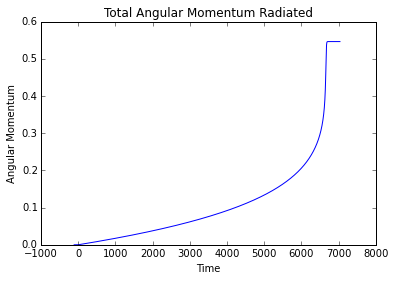

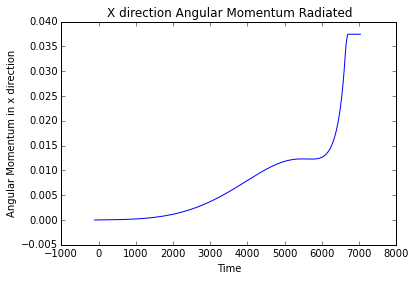

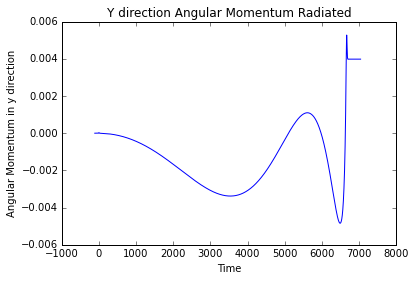

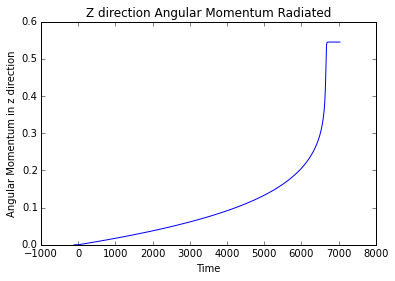

In [33]:
final_plane = final_spin[0:2]
remnant_plane = remnant_spin[0:2]
cosang = np.dot(final_plane,remnant_plane)
sinang = la.norm(np.cross(final_plane, remnant_plane))
cosine = np.dot(final_plane,remnant_plane)/(la.norm(final_plane)*la.norm(remnant_plane))
#print(la.norm(final_spin)/la.norm)
print("Angle 1: {}".format(np.arccos(cosine)*180/np.pi))
print("Angle 2: {}".format(np.arctan2(sinang, cosang)*180/np.pi))

print("Final Norms and Error: {}, {}, {}".format(la.norm(final_plane),la.norm(remnant_plane),mf.error(la.norm(final_plane),la.norm(remnant_plane))))


print("Mass Ratio: {}".format(initial_mass1/initial_mass2))
print("Initial Spin1: {}".format(initial_spin1))
print("Initial Spin2: {}".format(initial_spin2))
print("Final Spin of Blackhole Calculated : {}".format(final_spin))
print("Final Spin of Blackhole from Horizon Data : {}".format(remnant_spin))
print("Percentage Error from Horizon Data : {} ".format(np.abs(((final_spin-remnant_spin)/remnant_spin)*100)))
print("Magnitude of the final Angular Momentum : {}".format(final_total_spin))
print("Percentage Error from Horizon Data : {}".format(np.abs((final_total_spin-remnant_total_spin)/remnant_total_spin*100)))


plt.figure(1)
plt.title("Total Angular Momentum Radiated ")
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.plot(t[1:],Total_J)
plt.show()

plt.figure(2)
plt.title("X direction Angular Momentum Radiated")
plt.xlabel("Time")
plt.ylabel("Angular Momentum in x direction")
plt.plot(t[1:],J[0])
plt.show()

plt.figure(3)
plt.title("Y direction Angular Momentum Radiated")
plt.xlabel("Time")
plt.ylabel("Angular Momentum in y direction")
plt.plot(t[1:],J[1])
plt.show()

plt.figure(4)
plt.title("Z direction Angular Momentum Radiated")
plt.xlabel("Time")
plt.ylabel("Angular Momentum in z direction")
plt.plot(t[1:],J[2])
plt.show()



0.065427231333
0.0654272313318
(0.021156949652093301, 0.021310703796033316, 0.72673115202503913)


AttributeError: 'module' object has no attribute 'abc'